<a href="https://colab.research.google.com/github/MichaelR-DS/Retail_Customer_Segmentation/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
df = pd.read_csv('/content/drive/MyDrive/online_retail_data_analysis/rfm_df', index_col=0)

In [93]:
df

,freq_score,monetary_score,recency_score
CustomerID,,,
12347.0,5,4,5
12348.0,3,5,2
12349.0,4,4,4
12350.0,2,4,1
12352.0,4,5,3
...,...,...,...
18280.0,1,3,1
18281.0,1,2,1
18282.0,1,2,5


In [94]:
df.corr()

,freq_score,monetary_score,recency_score
freq_score,1.000000,-0.303337,0.483426
monetary_score,-0.303337,1.000000,-0.038750
recency_score,0.483426,-0.038750,1.000000


# Determine Optimal k value

In [97]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(df)
    Sum_of_squared_distances.append(kmeans.inertia_)

fig = go.Figure(data=go.Scatter(x=list(K), y=Sum_of_squared_distances))
fig.update_layout(title='Elbow Method For Optimal k',
                   xaxis_title='k',
                   yaxis_title='Sum Of Squared Distances',
                   width=800,
                   height=600)

fig.show()

In [98]:
kmeans = KMeans(n_clusters=4, random_state=2021).fit(df)
labels = kmeans.fit_predict(df)

# Cluster Visualisation

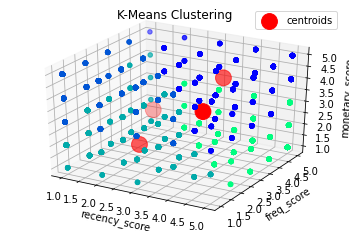

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            kmeans.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(df['recency_score'],df['freq_score'], df['monetary_score'],
                     c=labels, s=20, cmap='winter')


ax.set_title('K-Means Clustering')
ax.set_xlabel('recency_score')
ax.set_ylabel('freq_score')
ax.set_zlabel('monetary_score')
ax.legend()
plt.show()

In [100]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'recency_score'),yaxis = dict(title  = 'freq_score'),zaxis = dict(title  = 'monetary_score'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = labels
trace = go.Scatter3d(x=df.loc[:, 'recency_score'], y=df.loc[:, 'freq_score'], z=df.loc[:, 'monetary_score'], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [101]:
df.reset_index(inplace=True)
df['cluster'] = pd.DataFrame({'cluster':labels})
df

,CustomerID,freq_score,monetary_score,recency_score,cluster
0,12347.0,5,4,5,0
1,12348.0,3,5,2,1
2,12349.0,4,4,4,0
3,12350.0,2,4,1,1
4,12352.0,4,5,3,0
...,...,...,...,...,...
4331,18280.0,1,3,1,1
4332,18281.0,1,2,1,2
4333,18282.0,1,2,5,2
4334,18283.0,5,1,5,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



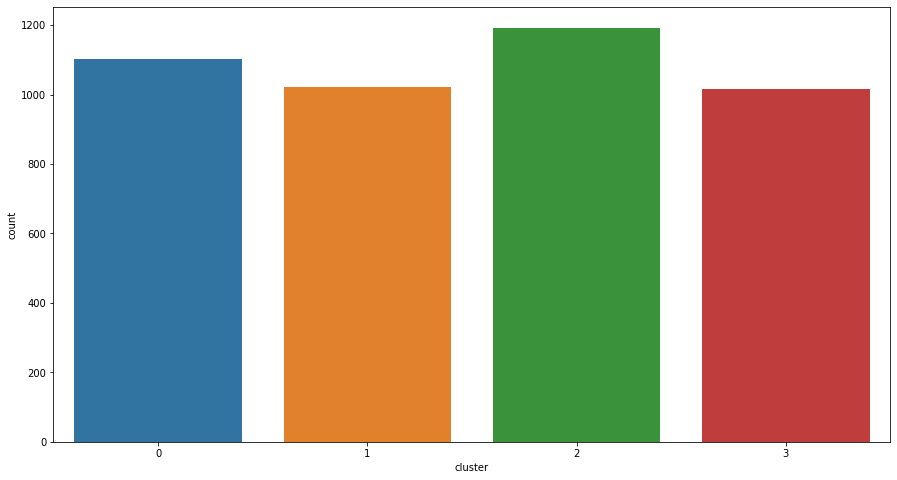

In [102]:
plt.figure(figsize=(15,8))
sns.countplot('cluster', data=df)

# Cluster Analysis And Insights

In [103]:
df = df[['freq_score', 'monetary_score', 'recency_score', 'cluster']]
pd.DataFrame(df.groupby('cluster').mean())

,freq_score,monetary_score,recency_score
cluster,,,
0,3.615942,4.087862,4.116848
1,1.450635,4.362659,1.982405
2,2.467728,1.993294,1.953060
3,4.429134,1.625984,4.122047


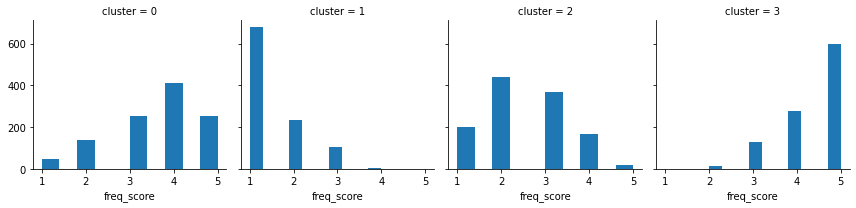

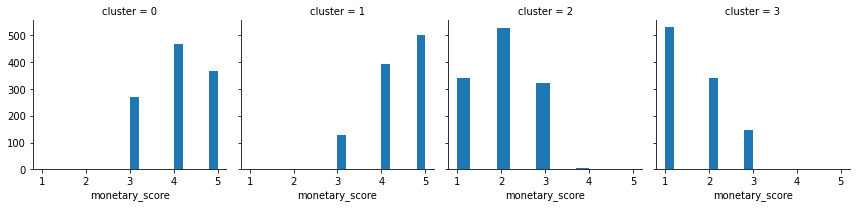

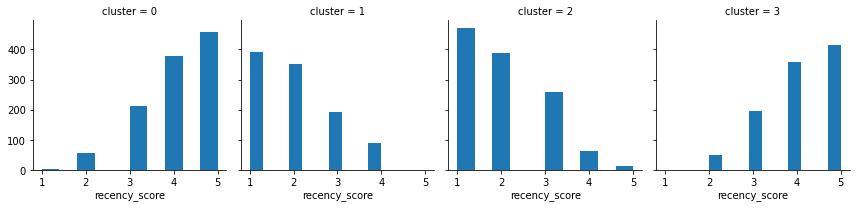

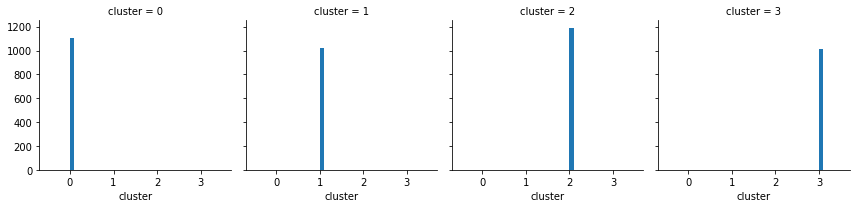

In [113]:
for cluster in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, cluster)

In [ ]:
quartiles = pd.DataFrame({})

rfm

* **cluster 0**: customers with more money to spend (an average of £28), make a good number of purchases (most often around 121 purchases total) and have made a purchase quite recently (most often within 13 days).  

* **cluster 1**: customers with only a few purchases, those being high value. Haven't made a purchase in a while. Could target this cluster with a email gently reminding them of their patronage, or even a future discount.

* **cluster 2**: customers who don't purchase as often, spend a smaller amount and are more likely to have not made a purchase recently. 

* **cluster 3**:  customers who purchase a lot of products with a lower value. Are likely recent customers.